In [44]:
!pip install -Uqq fastbook
!pip install graphviz

In [4]:
import fastbook
fastbook.setup_book()

In [5]:
from fastbook import *


In [37]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.185669,0.196999,0.060893,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.045716,0.160858,0.047361,00:49


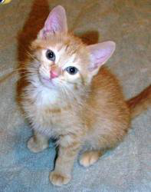

In [38]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [39]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [40]:
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])
uploader.data[0]

'images/chapter1_cat_example.jpg'

In [41]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [7]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.734997,2.539076,00:01


epoch,train_loss,valid_loss,time
0,1.589432,1.873457,00:01
1,1.407148,1.378905,00:01
2,1.383479,1.631150,00:01
3,1.363302,1.526014,00:01
4,1.268121,1.346270,00:01
5,1.167229,1.240730,00:01
6,1.078132,1.182657,00:01
7,1.006767,1.175785,00:01


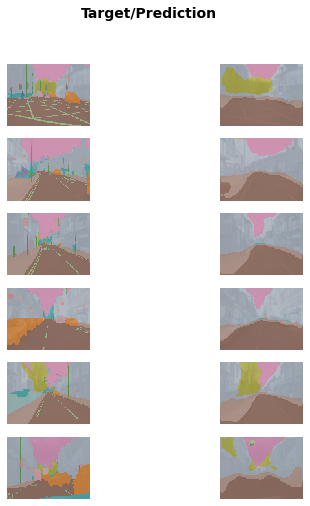

In [8]:
learn.show_results(max_n=6, figsize=(7,8))

In [9]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.463464,0.391889,0.826720,03:39


epoch,train_loss,valid_loss,accuracy,time
0,0.306706,0.274123,0.884520,07:26
1,0.253361,0.240402,0.904640,07:26
2,0.185735,0.193631,0.926480,07:27
3,0.144765,0.189955,0.928920,07:28


In [10]:
!echo "# fastai-learning" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/wbwatkinson/fastai-learning.git
!git push -u origin main

Initialized empty Git repository in /run/determined/workdir/.git/

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@264b1f1a421f.(none)')
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/wbwatkinson/fastai-learning.git'


In [13]:
!git config user.email "blair.watkinson@me.com"
!git config user.name "Blair Watkinson"

In [24]:
!gi

On branch main
Untracked files:
	.ipynb_checkpoints/
	Notebook.ipynb
	ch01.ipynb
	jupyter-conf.py

nothing added to commit but untracked files present
